**Part A** is for Binary classification

> Indented block


**Part B** is for multiclassification

Importing Dataset from google drive


In [ ]:
import pandas as pd
from google.colab import drive
import numpy
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import ipaddress
from sklearn.model_selection import train_test_split
from sklearn import tree
from matplotlib import pyplot as plt
drive.mount('/content/drive')
#dataframe=pd.read_csv("/content/drive/MyDrive/IoTID20/IoT Intrusion Dataset 2020.csv")
dataframe = pd.read_csv('/content/drive/My Drive/IoTID20.csv')
print(dataframe)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                                          Flow_ID           Src_IP  Src_Port  \
0        192.168.0.13-192.168.0.16-10000-10101-17     192.168.0.13     10000   
1         192.168.0.13-222.160.179.132-554-2179-6  222.160.179.132      2179   
2          192.168.0.13-192.168.0.16-9020-52727-6     192.168.0.16     52727   
3          192.168.0.13-192.168.0.16-9020-52964-6     192.168.0.16     52964   
4       192.168.0.1-239.255.255.250-36763-1900-17      192.168.0.1     36763   
...                                           ...              ...       ...   
625778   192.168.0.24-210.89.164.90-56112-8043-17     192.168.0.24     56112   
625779    192.168.0.13-222.131.171.244-554-4570-6  222.131.171.244      4570   
625780     192.168.0.13-192.168.0.16-9020-52739-6     192.168.0.16     52739   
625781     192.168.0.13-192.168.0.16-9020-49784-6     192.168.0.13     

Visulizing Data Set:

In [ ]:
dataframe.head(10)


,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.00,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.00,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.50,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.00,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.50,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg
5,192.168.0.24-101.79.244.148-41980-443-6,192.168.0.24,41980,101.79.244.148,443,6,10/09/2019 01:39:13 AM,157,2,1,...,0.0,0.0,0.0,78.50,6.363961,83.0,74.0,Anomaly,Mirai,Mirai-Hostbruteforceg
6,192.168.0.24-210.89.164.90-60175-8899-17,192.168.0.24,60175,210.89.164.90,8899,17,25/07/2019 03:21:01 AM,139,20,1,...,0.0,0.0,0.0,6.95,1.669384,10.0,4.0,Anomaly,Mirai,Mirai-UDP Flooding
7,192.168.0.24-58.225.75.83-41467-443-6,192.168.0.24,41467,58.225.75.83,443,6,11/07/2019 01:52:37 AM,112,0,2,...,0.0,0.0,0.0,112.00,0.000000,112.0,112.0,Anomaly,Scan,Scan Port OS
8,192.168.0.13-210.89.164.90-60132-8899-17,192.168.0.13,60132,210.89.164.90,8899,17,25/07/2019 03:21:13 AM,86,1,1,...,0.0,0.0,0.0,86.00,0.000000,86.0,86.0,Anomaly,Mirai,Mirai-UDP Flooding
9,192.168.0.13-111.149.163.151-554-7953-6,111.149.163.151,7953,192.168.0.13,554,6,26/05/2019 10:20:36 PM,6799,0,2,...,0.0,0.0,0.0,6799.00,0.000000,6799.0,6799.0,Anomaly,DoS,DoS-Synflooding


Describing Dataset:

In [ ]:
dataframe.describe()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
count,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.00000,625783.000000,625783.000000,625783.000000,625783.000000,...,625783.000000,625783.0,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000
mean,35026.156190,16387.027479,9.971436,635.422865,1.675566,1.46853,570.738980,929.280973,392.489726,348.126571,...,1.509913,0.0,3.764405,0.353385,4.248735,3.462159,502.503832,52.403995,561.540512,467.264459
std,24721.047752,17550.363037,5.379857,3496.740723,4.309970,1.21949,1161.873195,1731.760875,619.575865,588.161845,...,4.332737,0.0,68.064508,20.723370,88.934148,64.111043,2112.957360,1153.184897,2866.497606,1931.909971
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9020.000000,8899.000000,6.000000,76.000000,0.000000,1.00000,0.000000,18.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,73.000000,0.000000,74.000000,71.000000
50%,51991.000000,9020.000000,6.000000,132.000000,1.000000,1.00000,32.000000,104.000000,30.000000,30.000000,...,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,93.500000,0.000000,114.000000,78.000000
75%,56361.000000,10101.000000,17.000000,221.000000,2.000000,2.00000,1388.000000,1441.000000,1388.000000,386.000000,...,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,141.000000,1.527525,154.000000,130.000000
max,65500.000000,65371.000000,17.000000,99984.000000,186.000000,560.00000,109846.000000,773284.000000,1464.000000,1464.000000,...,186.000000,0.0,9044.625000,8598.658250,26785.000000,6659.000000,99973.000000,67071.906623,99973.000000,99973.000000



Defining input and target columns for Part A:



In [ ]:

inputA = dataframe.drop('Label', axis = 'columns')
print(inputA.head())
target_ColA = dataframe['Label']
print(target_ColA.head())

                                     Flow_ID           Src_IP  Src_Port  \
0   192.168.0.13-192.168.0.16-10000-10101-17     192.168.0.13     10000   
1    192.168.0.13-222.160.179.132-554-2179-6  222.160.179.132      2179   
2     192.168.0.13-192.168.0.16-9020-52727-6     192.168.0.16     52727   
3     192.168.0.13-192.168.0.16-9020-52964-6     192.168.0.16     52964   
4  192.168.0.1-239.255.255.250-36763-1900-17      192.168.0.1     36763   

            Dst_IP  Dst_Port  Protocol               Timestamp  Flow_Duration  \
0     192.168.0.16     10101        17  25/07/2019 03:25:53 AM             75   
1     192.168.0.13       554         6  26/05/2019 10:11:06 PM           5310   
2     192.168.0.13      9020         6  11/07/2019 01:24:48 AM            141   
3     192.168.0.13      9020         6  04/09/2019 03:58:17 AM            151   
4  239.255.255.250      1900        17  10/09/2019 01:41:18 AM            153   

   Tot_Fwd_Pkts  Tot_Bwd_Pkts  ...  Active_Mean  Active_Std  A

Defining input and target columns for PartB:


In [ ]:
inputB = dataframe.drop('Sub_Cat', axis = 'columns')
print(inputB.head())
target_ColB = dataframe['Sub_Cat']
print(target_ColB.head())

                                     Flow_ID           Src_IP  Src_Port  \
0   192.168.0.13-192.168.0.16-10000-10101-17     192.168.0.13     10000   
1    192.168.0.13-222.160.179.132-554-2179-6  222.160.179.132      2179   
2     192.168.0.13-192.168.0.16-9020-52727-6     192.168.0.16     52727   
3     192.168.0.13-192.168.0.16-9020-52964-6     192.168.0.16     52964   
4  192.168.0.1-239.255.255.250-36763-1900-17      192.168.0.1     36763   

            Dst_IP  Dst_Port  Protocol               Timestamp  Flow_Duration  \
0     192.168.0.16     10101        17  25/07/2019 03:25:53 AM             75   
1     192.168.0.13       554         6  26/05/2019 10:11:06 PM           5310   
2     192.168.0.13      9020         6  11/07/2019 01:24:48 AM            141   
3     192.168.0.13      9020         6  04/09/2019 03:58:17 AM            151   
4  239.255.255.250      1900        17  10/09/2019 01:41:18 AM            153   

   Tot_Fwd_Pkts  Tot_Bwd_Pkts  ...  Active_Mean  Active_Std  A

DataPreporcessing Part A:

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_inputA = LabelEncoder()
inputA = inputA.apply(label_inputA.fit_transform)
print(inputA.head())

   Flow_ID  Src_IP  Src_Port  Dst_IP  Dst_Port  Protocol  Timestamp  \
0    12446   25883      8006     203        76         2       3496   
1    22760   34617      1186     200        10         1       3664   
2    12691   25886      9854     200        70         1       2082   
3    12704   25886      9916     200        70         1        791   
4      611   25881      8443     317        13         2       1040   

   Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  ...  Active_Mean  Active_Std  \
0             75             1             0  ...            0           0   
1           5297             1             1  ...            0           0   
2            141             0             2  ...            0           0   
3            151             0             1  ...            0           0   
4            153             2             0  ...            0           0   

   Active_Max  Active_Min  Idle_Mean  Idle_Std  Idle_Max  Idle_Min  Cat  \
0           0           0    

DataPreporcessing PartB:

In [ ]:
label_inputPartB = LabelEncoder()
inputB = inputB.apply(label_inputPartB.fit_transform)
print(inputB.head())

   Flow_ID  Src_IP  Src_Port  Dst_IP  Dst_Port  Protocol  Timestamp  \
0    12446   25883      8006     203        76         2       3496   
1    22760   34617      1186     200        10         1       3664   
2    12691   25886      9854     200        70         1       2082   
3    12704   25886      9916     200        70         1        791   
4      611   25881      8443     317        13         2       1040   

   Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  ...  Active_Mean  Active_Std  \
0             75             1             0  ...            0           0   
1           5297             1             1  ...            0           0   
2            141             0             2  ...            0           0   
3            151             0             1  ...            0           0   
4            153             2             0  ...            0           0   

   Active_Max  Active_Min  Idle_Mean  Idle_Std  Idle_Max  Idle_Min  Label  Cat  
0           0          

Splitting the dataset into test and train columns Part A:

In [ ]:
from sklearn.model_selection import train_test_split

X_trainA, X_testA, y_trainA, y_testA = train_test_split(inputA, target_ColA, test_size=0.2)

Aplying Decision Tree Classification Part A:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
modelPartA = DecisionTreeClassifier()
modelPartA.fit(X_trainA, y_trainA)

DecisionTreeClassifier()

Accuracy of the model Part A:

In [ ]:

from sklearn.metrics import accuracy_score
accuracyPartA = modelPartA.score(X_testA, y_testA)*100
print("Accuracy of Part A model = ", accuracyPartA, "%")

Accuracy of Part A model =  100.0 %


spliting test and train data PartB:

In [ ]:
X_trainB, X_testB, y_trainB, y_testB = train_test_split(inputB, target_ColB, test_size=0.3)

Aplying Decision tree classification Part B:

In [ ]:
modelPartB = DecisionTreeClassifier()
modelPartB.fit(X_trainB, y_trainB)

DecisionTreeClassifier()

Accuracy of model PartB:

In [ ]:
accuracyPartB = modelPartB.score(X_testB, y_testB)*100
print("Accuracy of Part B model = ", accuracyPartB, "%")

Accuracy of Part B model =  77.90555836684689 %


Applying Naive bayes classification Part A:

In [ ]:
from sklearn.naive_bayes import GaussianNB
modelA_NB = GaussianNB()
modelA_NB.fit(X_trainA, y_trainA);

Accuray of Naive baye Part A:

In [ ]:
accuracyPartA_NB = modelA_NB.score(X_testA, y_testA)*100
print("Accuracy of Part A model = ", accuracyPartA_NB, "%")

Accuracy of Part A model =  80.36146599870563 %


Applying naive_bayes classification on Part B:

In [ ]:
modelB_NB = GaussianNB()
modelB_NB.fit(X_trainB, y_trainB);

Accuracy of Naive Bayes model Part B:

In [ ]:
accuracyPartB_NB = modelB_NB.score(X_testB, y_testB)*100
print("Accuracy of Part B model = ", accuracyPartB_NB, "%")

Accuracy of Part B model =  59.69052121341253 %


Single class classification:
Part A:

1-Accuracy

In [ ]:
Y_predA=modelPartA.predict(X_testA)
print("Accuracy of Part A model after aplying decision tree:   ",metrics.accuracy_score(y_testA, Y_predA)*100 ,"%")
Y_predB=modelPartB.predict(X_testB)
print("Accuracy of Part B model after aplying decision tree:   ",metrics.accuracy_score(y_testB, Y_predB)*100 ,"%")
y_predA_nb=modelA_NB.predict(X_testA)
print("Accuracy of Part A model after aplying Naive bayes :   ",metrics.accuracy_score(y_testA, y_predA_nb)*100 ,"%")
y_predB_nb=modelB_NB.predict(X_testB)
print("Accuracy of Part B model after aplying Naive bayes :   ",metrics.accuracy_score(y_testB, y_predB_nb)*100 ,"%")


Accuracy of Part A model after aplying decision tree:    100.0 %
Accuracy of Part B model after aplying decision tree:    77.90555836684689 %
Accuracy of Part A model after aplying Naive bayes :    80.36146599870563 %
Accuracy of Part B model after aplying Naive bayes :    59.69052121341253 %


2-Precision

In [ ]:
prec_A = metrics.precision_score(y_testA, Y_predA,average='micro')
print("Precision for part A model after applying decision tree:",prec_A)
prec_B = metrics.precision_score(y_testB, Y_predB,average='micro')
print("Precision for part B model after applying decision tree:",prec_B)
prec_PartA_nb=metrics.precision_score(y_testA, y_predA_nb,average='micro')
print("Precision for Part A model after aplying Naive bayes:   " ,prec_PartA_nb)
prec_PartB_nb=metrics.precision_score(y_testB, y_predB_nb,average='micro')
print("Precision for Part B model after aplying Naive bayes:   " ,prec_PartB_nb)

Precision for part A model after applying decision tree: 1.0
Precision for part B model after applying decision tree: 0.7790555836684688
Precision for Part A model after aplying Naive bayes:    0.8036146599870563
Precision for Part B model after aplying Naive bayes:    0.5969052121341253


3-Recall

In [ ]:
recall_partA = metrics.recall_score(y_testA, Y_predA,average='micro')
print("Recall score for model Part A after applying decison tree:",recall_partA)
recall_partB = metrics.recall_score(y_testB, Y_predB,average='micro')
print("Recall score  model Part B after applying decison tree:",recall_partB)
recall_PartA_nb=metrics.recall_score(y_testA, y_predA_nb,average='micro')
print(" Recall score Part A model after aplying Naive bayes:   " ,recall_PartA_nb)
recall_PartB_nb=metrics.recall_score(y_testB, y_predB_nb,average='micro')
print(" Recall score for Part B model after aplying Naive bayes:   " ,recall_PartB_nb)

Recall score for model Part A after applying decison tree: 1.0
Recall score  model Part B after applying decison tree: 0.7790555836684688
 Recall score Part A model after aplying Naive bayes:    0.8036146599870563
 Recall score for Part B model after aplying Naive bayes:    0.5969052121341253


F1 Score(F Measure)
The F measure can be claculated using the formula F-Measure = (2 * Precision * Recall) / (Precision + Recall)

In [ ]:
Fmeasure_PartA=(2*prec_A*recall_partA)/(prec_A+recall_partA)
print("The F measure for model part A after applying decision tree:  ",Fmeasure_PartA)
Fmeasure_PartB=(2*prec_B*recall_partB)/(prec_B+recall_partB)
print("The F measure for model part B after applying decision tree:  ",Fmeasure_PartB)
Fmeasure_PartA_nb=(2*prec_PartA_nb*recall_PartA_nb)/(prec_PartA_nb+recall_PartA_nb)
print("The F measure for model part A after applying Naive bayes:  ",Fmeasure_PartA_nb)
Fmeasure_PartB_nb=(2*prec_PartB_nb*recall_PartB_nb)/(prec_PartB_nb+recall_PartB_nb)
print("The F measure for model part B after applying Naive bayes:  ",Fmeasure_PartB_nb)

The F measure for model part A after applying decision tree:   1.0
The F measure for model part B after applying decision tree:   0.7790555836684688
The F measure for model part A after applying Naive bayes:   0.8036146599870562
The F measure for model part B after applying Naive bayes:   0.5969052121341253


Part A model:

Confusion Matrix


Confusion Matrix for descison tree

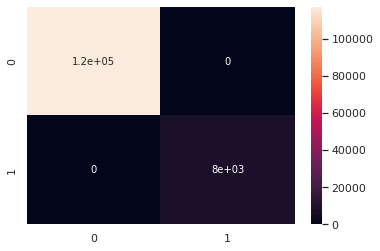

In [ ]:
import seaborn as sn
df_cm = pd.DataFrame(metrics.confusion_matrix(y_testA, Y_predA), range(2), range(2))
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}) # font size
plt.show()

Confusion Matrix for  Naive bayes classification

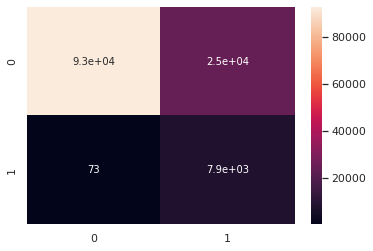

In [ ]:
import seaborn as sn
df_cm = pd.DataFrame(metrics.confusion_matrix(y_testA, y_predA_nb), range(2), range(2))
sn.set(font_scale=1)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}) # font size
plt.show()

True Positive Rate (Sensitivity)

True Positive rate can be calculated as Rate = TP/TP+FN Where TP = Total true positives FN = Total False Negatives

---



For Decision Tree:

In [ ]:
tn_dt,fp_dt,fn_dt,tp_dt = metrics.confusion_matrix(y_testA, Y_predA).ravel()
print("True Positive rate for Decision trees is: ", tp_dt/(tp_dt+fn_dt))

True Positive rate for Decision trees is:  1.0


For Naive bayes:

In [ ]:
tn_nb,fp_nb,fn_nb,tp_nb = metrics.confusion_matrix(y_testA, y_predA_nb).ravel()
print("True Positive rate for naive bayes is: ", tp_nb/(tp_nb+fn_nb))

True Positive rate for naive bayes is:  0.9908635794743429


False Positive Rate (Specificity)


---







False Positive rate can be calculated as False Positive Rate = FP/FP+TN Where FP = Total False positives TN = Total True Negatives

For Decision tree:

In [ ]:
tn_dt,fp_dt,fn_dt,tp_dt = metrics.confusion_matrix(y_testA, Y_predA).ravel()
print("False Positive rate for Decision trees is: ", fp_dt/(fp_dt+tn_dt))

False Positive rate for Decision trees is:  0.0


For Naive bayes:

In [ ]:
tn_nb,fp_nb,fn_nb,tp_nb = metrics.confusion_matrix(y_testA, y_predA_nb).ravel()
print("False Positive rate for naive bayes is: ", fp_nb/(fp_nb+tn_nb))

False Positive rate for naive bayes is:  0.20915445475261807


Classification Report:

For Decision Tree:

In [ ]:
print(metrics.classification_report(y_testA, Y_predA, labels=['Normal','Anomaly']))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      7990
     Anomaly       1.00      1.00      1.00    117167

    accuracy                           1.00    125157
   macro avg       1.00      1.00      1.00    125157
weighted avg       1.00      1.00      1.00    125157



For Naive Bayes:

In [ ]:
print(metrics.classification_report(y_testA, y_predA_nb, labels=['Normal','Anomaly']))

              precision    recall  f1-score   support

      Normal       0.24      0.99      0.39      7990
     Anomaly       1.00      0.79      0.88    117167

    accuracy                           0.80    125157
   macro avg       0.62      0.89      0.64    125157
weighted avg       0.95      0.80      0.85    125157



Multi class classification:

---
Part B:



Confusion matrix:

---



For Decision Tree:

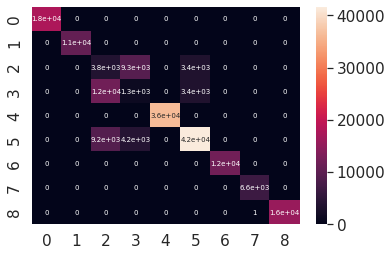

In [ ]:
import seaborn as sn
df_cm = pd.DataFrame(metrics.confusion_matrix(y_testB, Y_predB), range(9), range(9))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 7}) # font size
plt.show()

For Naive bayes:

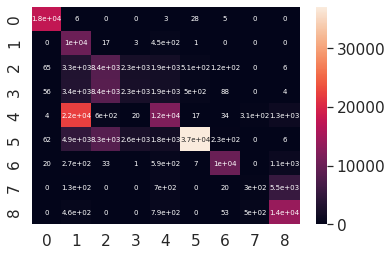

In [ ]:
import seaborn as sn
df_cm = pd.DataFrame(metrics.confusion_matrix(y_testB, y_predB_nb), range(9), range(9))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 7}) # font size
plt.show()

True Positive Rate (Sensitivity)

True Positive rate can be calculated as Rate = TP/TP+FN Where TP = Total true positives FN = Total False Negatives

For Decision Tree:

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_testB, Y_predB)

fp_dt = cnf_matrix.sum(axis=0) - numpy.diag(cnf_matrix)
fn_dt = cnf_matrix.sum(axis=1) - numpy.diag(cnf_matrix)
tp_dt = numpy.diag(cnf_matrix)
tn_dt = cnf_matrix.sum() - (fp_dt + fp_dt + fp_dt)

fp_dt = fp_dt.astype(float)
fn_dt = fn_dt.astype(float)
tp_dt = tp_dt.astype(float)
tn_dt = tn_dt.astype(float)

TPR_dt = tp_dt/(tp_dt+fn_dt)
tpr_dt =0
for i in TPR_dt:
  tpr_dt +=i
tpr_dt = tpr_dt/len(TPR_dt)
print("True Positive rate for naive bayes is: ", tpr_dt)

True Positive rate for naive bayes is:  0.7853280172240142


For Naive bayes:

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_testB, y_predB_nb)

fp_nb = cnf_matrix.sum(axis=0) - numpy.diag(cnf_matrix)
fn_nb = cnf_matrix.sum(axis=1) - numpy.diag(cnf_matrix)
tp_nb = numpy.diag(cnf_matrix)
tn_nb = cnf_matrix.sum() - (fp_nb + fp_nb + fp_nb)

fp_nb = fp_nb.astype(float)
fn_nb = fn_nb.astype(float)
tp_nb = tp_nb.astype(float)
tn_nb = tn_nb.astype(float)

TPR_nb = tp_nb/(tp_nb+fn_nb)
tpr_nb =0
for i in TPR_nb:
  tpr_nb +=i
tpr_nb = tpr_nb/len(TPR_nb)
print("True Positive rate for naive bayes is: ", tpr_nb)

True Positive rate for naive bayes is:  0.5958910278851758


False Positive Rate (Specificity)

False Positive rate can be calculated as False Positive Rate = FP/FP+TN Where FP = Total False positives TN = Total True Negatives

For Decision Tree:

In [ ]:
FPR_dt = fp_dt/(fp_dt+tn_dt)
fpr_dt =0
for i in FPR_dt:
  fpr_dt +=i
fpr_dt = fpr_dt/len(FPR_dt)
print("False Positive rate for naive bayes is: ", fpr_dt)

False Positive rate for naive bayes is:  0.02984820033142855


For Naive bayes:

In [ ]:
FPR_nb = fp_nb/(fp_nb+tn_nb)
fpr_nb =0
for i in FPR_nb:
  fpr_nb +=i
fpr_nb = fpr_nb/len(FPR_nb)
print("False Positive rate for naive bayes is: ", fpr_nb)

False Positive rate for naive bayes is:  0.06022673966963083


ROC Curves:

For Decision Tree:

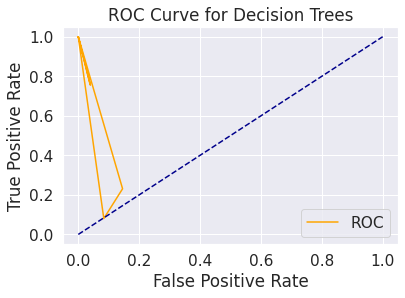

In [ ]:
plt.plot(FPR_dt,TPR_dt, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Trees')
plt.legend()
plt.show()

For Naive Bayes:

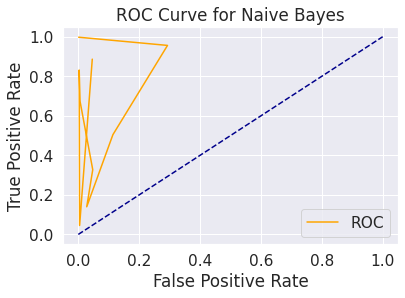

In [ ]:
plt.plot(FPR_nb,TPR_nb, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes')
plt.legend()
plt.show()

Classification Report:

For decision Tree:

In [ ]:
print(metrics.classification_report(y_testB, Y_predB, labels=['Mirai-Ackflooding','DoS-Synflooding','Scan Port OS','Mirai-Hostbruteforceg','Mirai-UDP Flooding','Mirai-HTTP Flooding','Normal','Scan Hostport','MITM ARP Spoofing']))

                       precision    recall  f1-score   support

    Mirai-Ackflooding       0.15      0.23      0.18     16582
      DoS-Synflooding       1.00      1.00      1.00     17786
         Scan Port OS       1.00      1.00      1.00     15896
Mirai-Hostbruteforceg       1.00      1.00      1.00     36403
   Mirai-UDP Flooding       0.86      0.76      0.80     55007
  Mirai-HTTP Flooding       0.09      0.08      0.09     16678
               Normal       1.00      1.00      1.00     12088
        Scan Hostport       1.00      1.00      1.00      6645
    MITM ARP Spoofing       1.00      1.00      1.00     10650

             accuracy                           0.78    187735
            macro avg       0.79      0.79      0.79    187735
         weighted avg       0.80      0.78      0.79    187735



For Naive bayes:

In [ ]:
print(metrics.classification_report(y_testB, y_predB_nb, labels=['Mirai-Ackflooding','DoS-Synflooding','Scan Port OS','Mirai-Hostbruteforceg','Mirai-UDP Flooding','Mirai-HTTP Flooding','Normal','Scan Hostport','MITM ARP Spoofing']))

                       precision    recall  f1-score   support

    Mirai-Ackflooding       0.32      0.50      0.40     16582
      DoS-Synflooding       0.99      1.00      0.99     17786
         Scan Port OS       0.64      0.89      0.74     15896
Mirai-Hostbruteforceg       0.59      0.33      0.42     36403
   Mirai-UDP Flooding       0.97      0.67      0.80     55007
  Mirai-HTTP Flooding       0.32      0.14      0.19     16678
               Normal       0.95      0.83      0.89     12088
        Scan Hostport       0.27      0.05      0.08      6645
    MITM ARP Spoofing       0.23      0.96      0.37     10650

             accuracy                           0.60    187735
            macro avg       0.59      0.60      0.54    187735
         weighted avg       0.69      0.60      0.60    187735

